<a href="https://colab.research.google.com/github/Super-rookie-Py/_MachineLearning_Class/blob/main/%EB%B0%95%EA%B1%B4%EC%9A%B0__5_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [48]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.2177283706374875
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [6]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("RPF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("RPF SVR 평가 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.715506620496448
Linear SVR 평가 데이터 점수: 0.6380398541506058
Polynomial SVR 학습 데이터 점수: 0.2024454261446289
Polynomial SVR 평가 데이터 점수: 0.133668450367462
RPF SVR 학습 데이터 점수: 0.2177283706374875
RPF SVR 평가 데이터 점수: 0.13544178468518187


In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("RPF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RPF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 평가 데이터 점수: 0.9230769230769231
RPF SVC 학습 데이터 점수: 0.9014084507042254
RPF SVC 평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [11]:
polynomial_svc = SVC(kernel="poly", degree = 2, C = 0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel = poly, degree = {}, C = {}, gamma={}".format(2, 0.1, "auto"))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

kernel = poly, degree = 2, C = 0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [15]:
rbf_svc = SVC(kernel="rbf", C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel = poly, C = {}, gamma={}".format(2.0, "scale"))
print("RPF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RPF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

kernel = poly, C = 2.0, gamma=scale
RPF SVC 학습 데이터 점수: 0.9154929577464789
RPF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [36]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [37]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.9300699300699301


## Linear SVR

### 보스턴 주택 가격

In [42]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7378770753376414
평가 데이터 점수: 0.5938233167142117


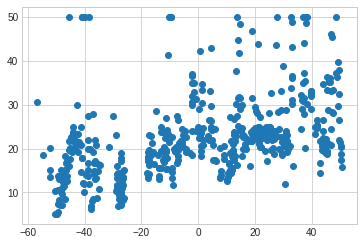

In [46]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

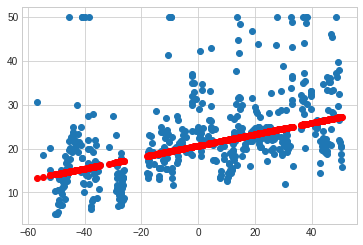

In [47]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [49]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.02912664, 0.02785373, 0.02660298, 0.02629352, 0.02431893]),
 'score_time': array([0.00232625, 0.00213122, 0.00212574, 0.00206828, 0.00135064]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [50]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [51]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [52]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5206983232432754
평가 데이터 점수: 0.45021162200153253


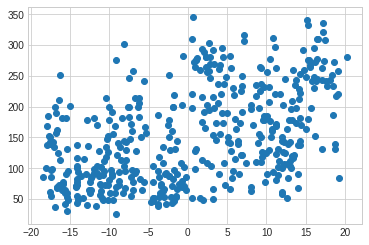

In [57]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

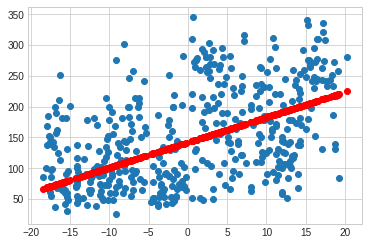

In [58]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [59]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.01853466, 0.0133698 , 0.01085496, 0.01105189, 0.013484  ]),
 'score_time': array([0.00182486, 0.00184369, 0.00200391, 0.0016017 , 0.00109792]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [60]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [61]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

## Kernel SVR

### 보스턴 주택 가격

In [62]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6715372583602904
평가 데이터 점수: 0.6796956703596322


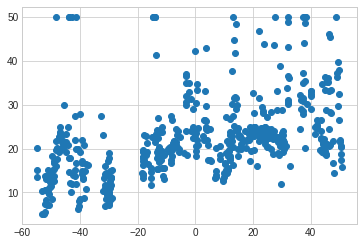

In [66]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

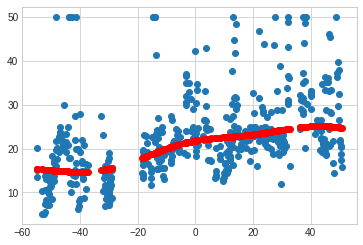

In [67]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [68]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02659798, 0.02903605, 0.02058578, 0.02010083, 0.01654649]),
 'score_time': array([0.00359321, 0.00558925, 0.00338697, 0.00358701, 0.00228786]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [69]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial','sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [70]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [71]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma'

In [72]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [73]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.18539480657395013
평가 데이터 점수: 0.1292294744825575


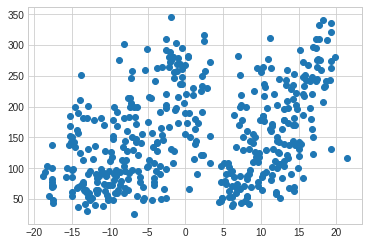

In [77]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

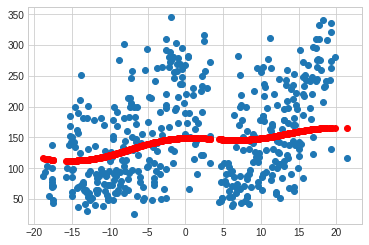

In [78]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [79]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02010131, 0.01909423, 0.0147922 , 0.01426435, 0.01301241]),
 'score_time': array([0.00298309, 0.0028038 , 0.00268435, 0.0027566 , 0.00176144]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [80]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial','sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [81]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [82]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='sigmoid',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__ga

In [83]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [84]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [85]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.39919100130760954
평가 데이터 점수: 0.2559060342973408


## Linear SVC

### 유방암

In [86]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9736842105263158


In [92]:
def make_meshgrid(x, y, h = 0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [93]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  out = plt.contourf(xx, yy, Z, **params)

  return out

In [95]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

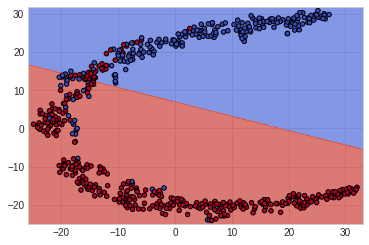

In [96]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [97]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00952792, 0.00652957, 0.00634933, 0.0053525 , 0.00561309]),
 'score_time': array([0.0011642 , 0.00102329, 0.00090456, 0.0007987 , 0.00089884]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [98]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [99]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [100]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [101]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9846153846153847
평가 데이터 점수: 0.9736842105263158


### 붓꽃

In [102]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9833333333333333
평가 데이터 점수: 1.0


In [106]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

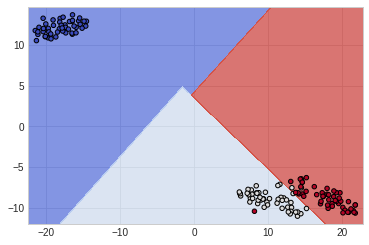

In [107]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [108]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00285959, 0.00284052, 0.0018878 , 0.00162578, 0.00145912]),
 'score_time': array([0.00075865, 0.00081015, 0.00059628, 0.00056076, 0.00054336]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [109]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [110]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [111]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [112]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9833333333333333
평가 데이터 점수: 1.0


### 와인

In [113]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [114]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


In [117]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

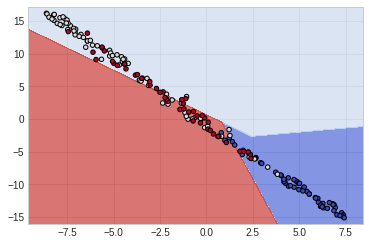

In [118]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [119]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00287724, 0.00352597, 0.00444317, 0.00517726, 0.00176263]),
 'score_time': array([0.00080419, 0.00169086, 0.00049615, 0.00062895, 0.00054288]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [120]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [121]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [122]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [123]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9929577464788732
평가 데이터 점수: 1.0


## Kernel SVC

### 유방암

In [124]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9736842105263158


In [128]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

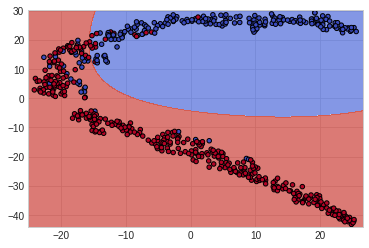

In [129]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [131]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01035929, 0.00795054, 0.00852704, 0.00781941, 0.00667357]),
 'score_time': array([0.00182199, 0.00406623, 0.00185108, 0.00188327, 0.00125504]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [132]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [133]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [134]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [135]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9736842105263158


### 붓꽃

In [137]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [138]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


In [141]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

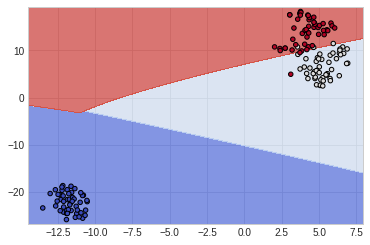

In [142]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [143]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00576615, 0.00312018, 0.00254989, 0.00142765, 0.00167251]),
 'score_time': array([0.00079656, 0.00083208, 0.0006845 , 0.0034709 , 0.00049019]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [144]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [145]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [146]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [147]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


### 와인

In [148]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [149]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


In [152]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

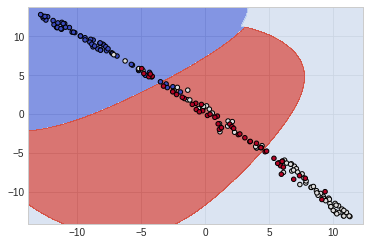

In [153]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap = plt.cm.coolwarm, s=20, edgecolors='k');

In [154]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

cross_validate(
    estimator=estimator,
    X= X, y= y,
    cv= 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00275874, 0.00294805, 0.0073688 , 0.00209332, 0.00245404]),
 'score_time': array([0.00811744, 0.00190806, 0.00069189, 0.00063062, 0.00065112]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [155]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               "model__C": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [156]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [157]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [158]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222
